In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

# Without translational invariance training

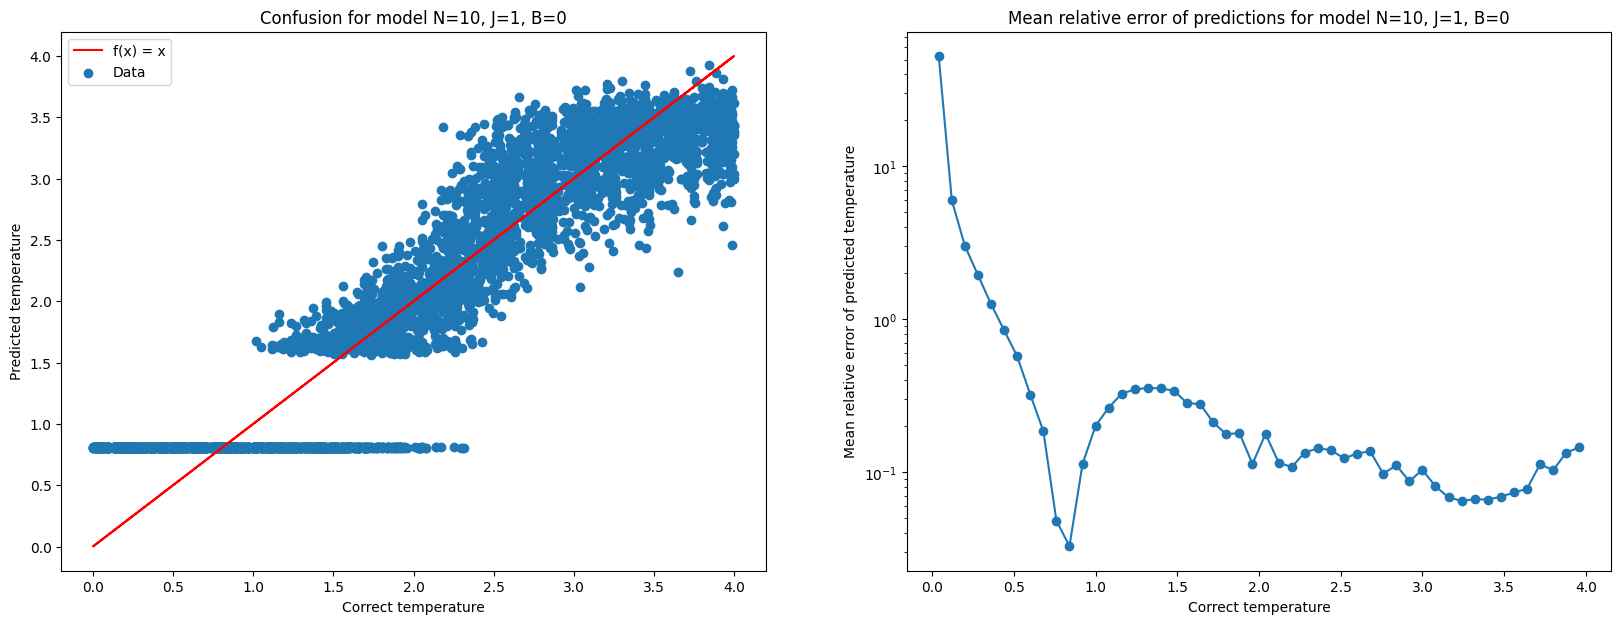

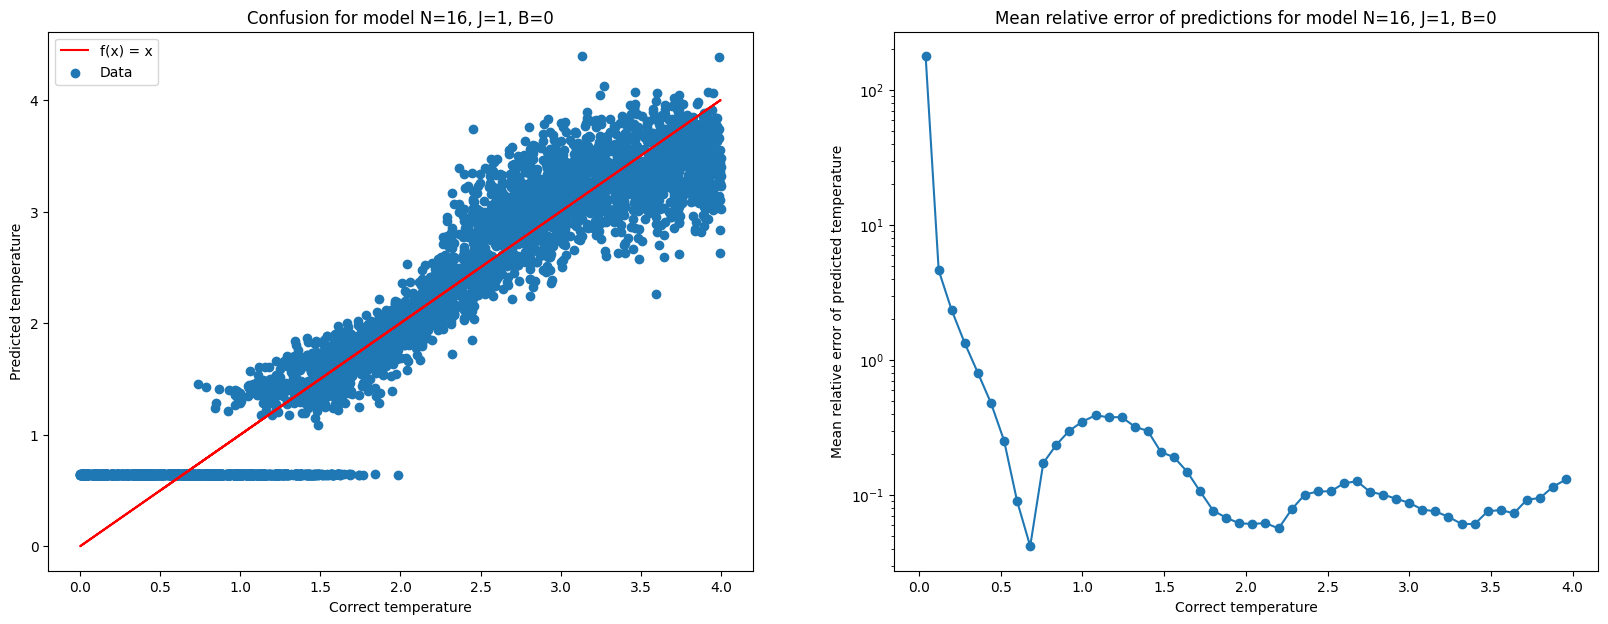

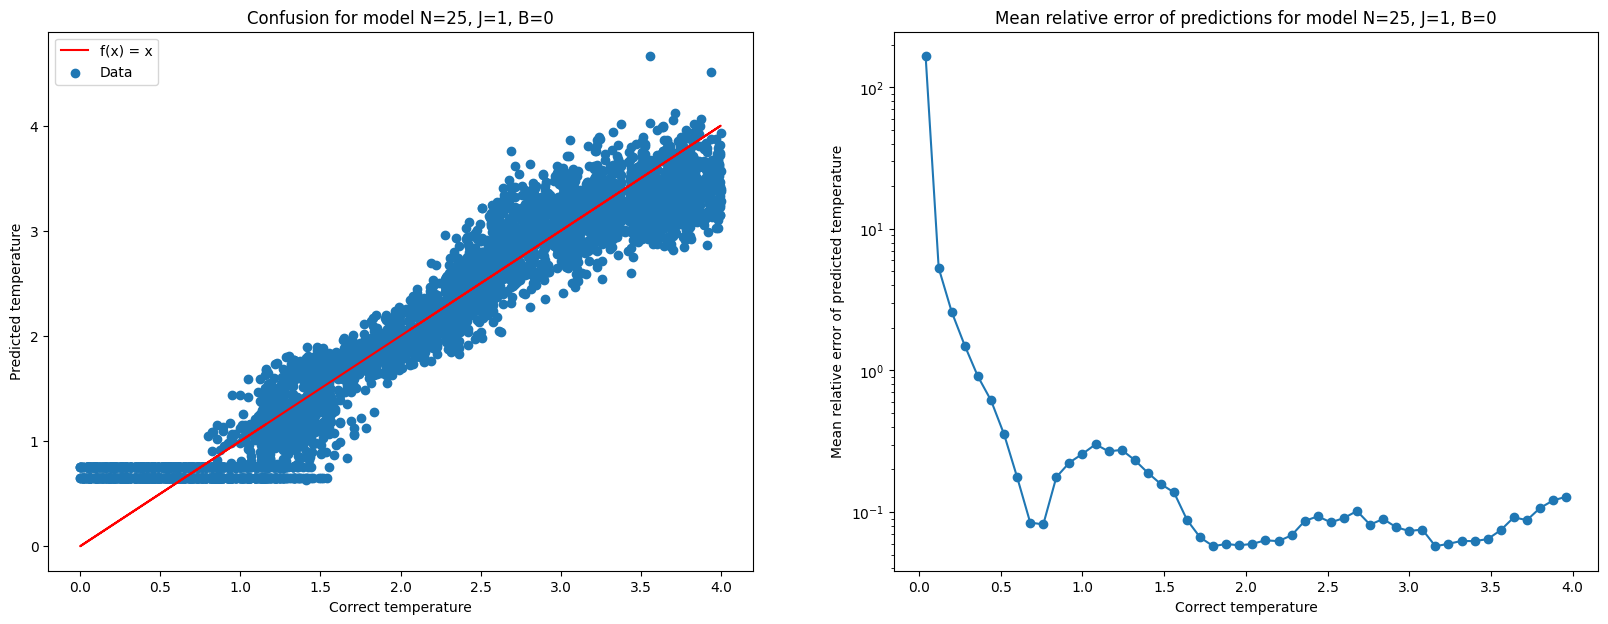

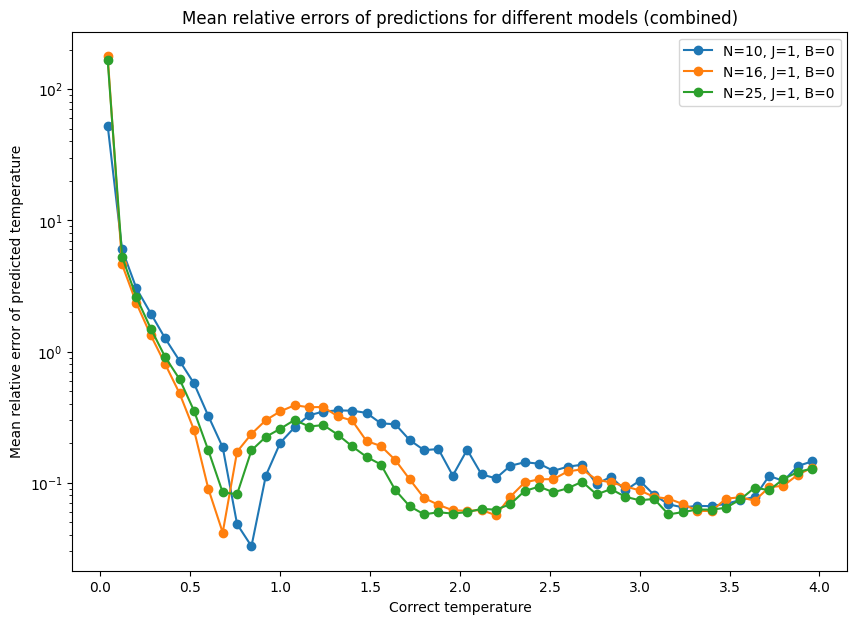

In [2]:
Ns = [10, 16, 25]
Js = [1]
Bs = [0]

bins = 50
temp_max = 4.0
temp_min = 0.0

# Prepare needed lists/parameters

files_not_found = 0
combined_errors = {}
bin_centers = np.arange(0, temp_max, (temp_max - temp_min)/bins) + (temp_max - temp_min)/(2*bins)

for N in Ns:
    for J in Js:
        for B in Bs:
            filename = f"ising_nn_models/N_{N}_J_{J}_B_{B}.csv"
            if not os.path.isfile(filename):
                files_not_found += 1
                continue

            data = np.loadtxt(filename, skiprows=1, delimiter=",")

            fig, ax = plt.subplots(1, 2, figsize=(20, 7))

            ax[0].plot(data[:, 0], data[:, 0], color="red", label="f(x) = x")
            ax[0].scatter(data[:, 0], data[:, 1], label="Data")

            ax[0].set_xlabel("Correct temperature")
            ax[0].set_ylabel("Predicted temperature")
            ax[0].set_title(f"Confusion for model N={N}, J={J}, B={B}")

            ax[0].legend()

            counts = np.zeros(bins)
            errors = np.zeros(bins)

            for temp_init, temp_pred in data:
                bin_index = int(np.floor(temp_init/((temp_max - temp_min)/bins)) if temp_init != temp_max else bins - 1)

                counts[bin_index] += 1
                errors[bin_index] += np.abs((temp_init - temp_pred)/temp_init)
            
            errors /= counts

            combined_errors[(N, J, B)] = errors

            ax[1].plot(bin_centers, errors, marker="o")

            ax[1].set_xlabel("Correct temperature")
            ax[1].set_ylabel("Mean relative error of predicted temperature")
            ax[1].set_title(f"Mean relative error of predictions for model N={N}, J={J}, B={B}")

            ax[1].set_yscale("log")

            plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_xlabel("Correct temperature")
ax.set_ylabel("Mean relative error of predicted temperature")
ax.set_title(f"Mean relative errors of predictions for different models (combined)")

for params, errors in combined_errors.items():
    ax.plot(bin_centers, errors, marker="o", label=f"N={params[0]}, J={params[1]}, B={params[2]}")

ax.set_yscale("log")

ax.legend()

plt.show()

if files_not_found:
    print(f"Warning: Not showing {files_not_found} plots because the related data was not found")

# With translational invariance training

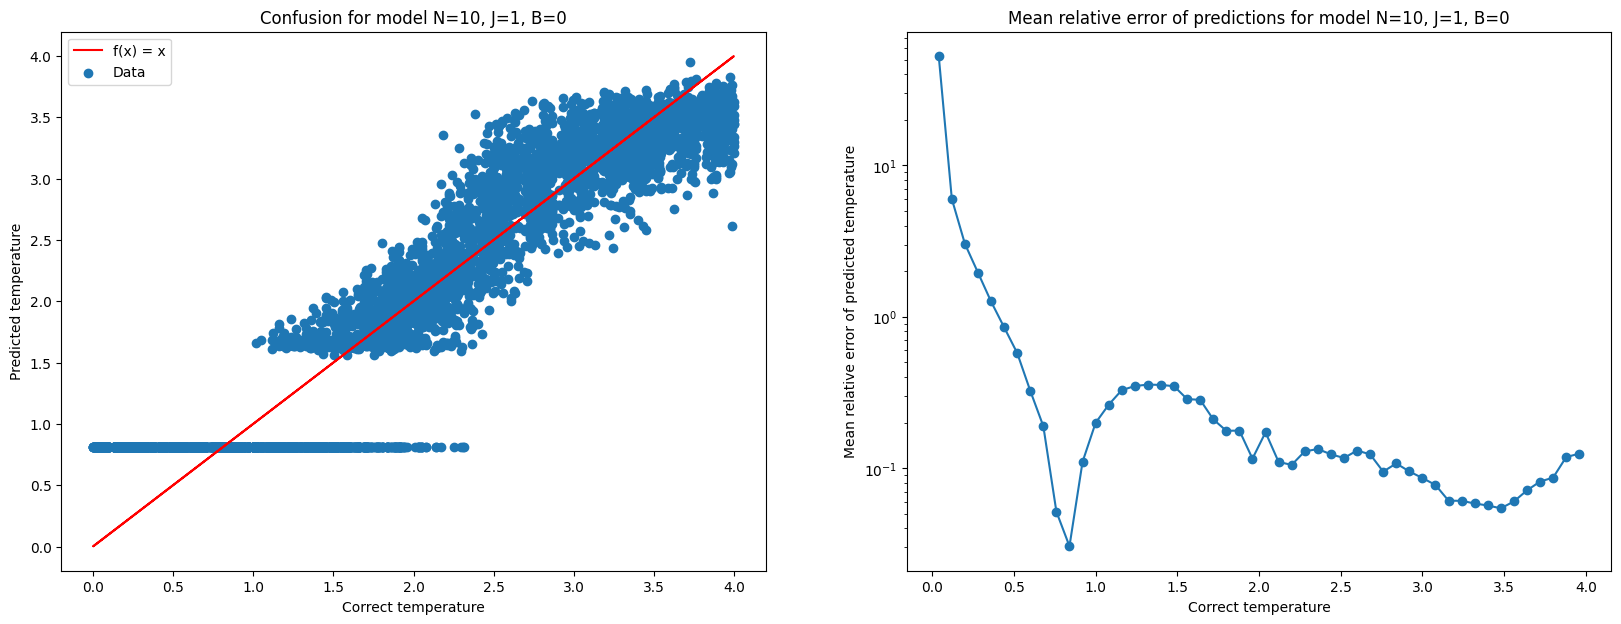

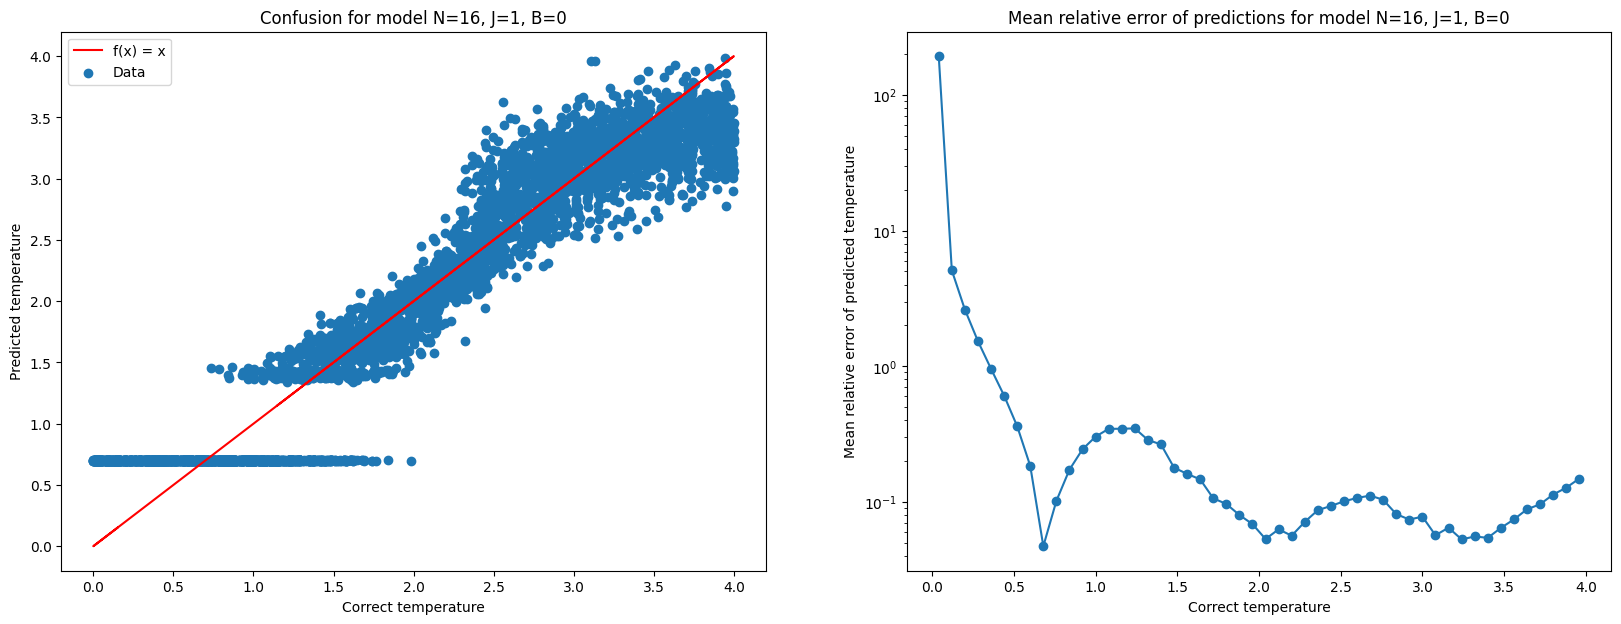

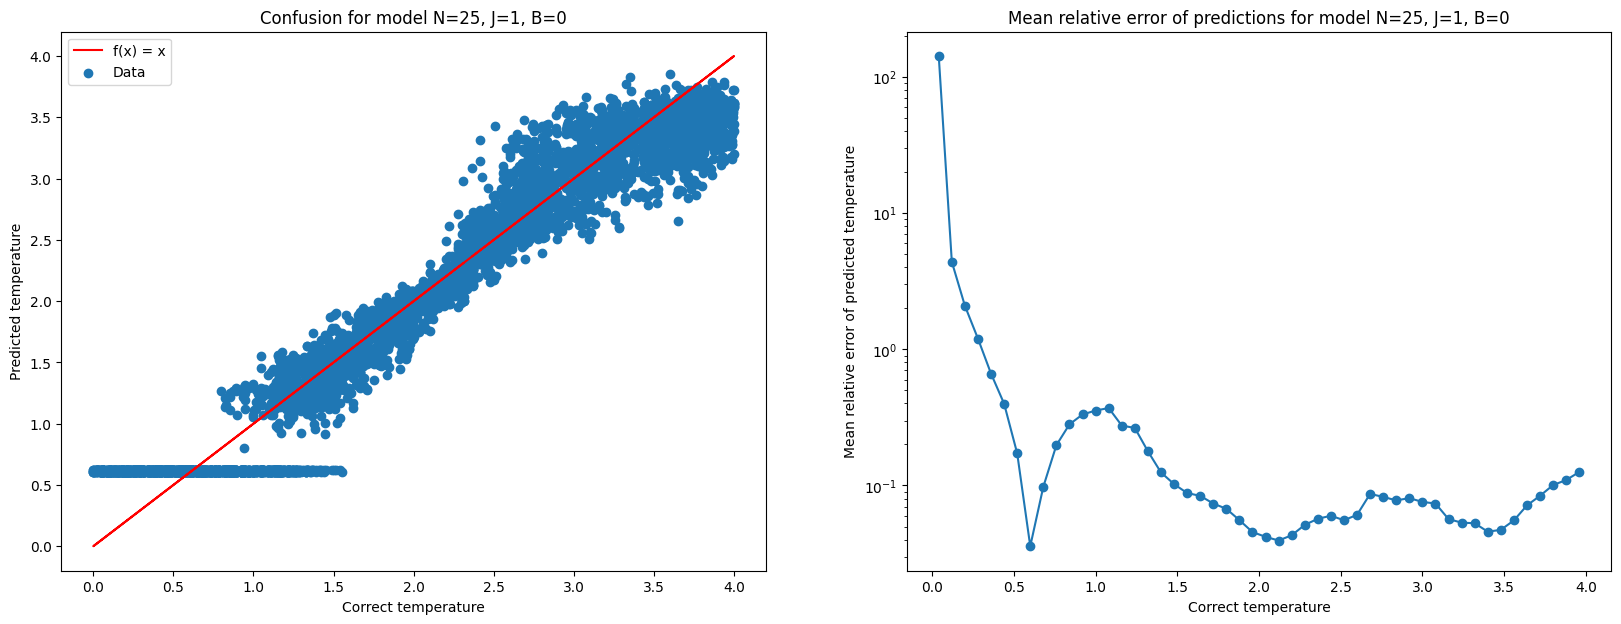

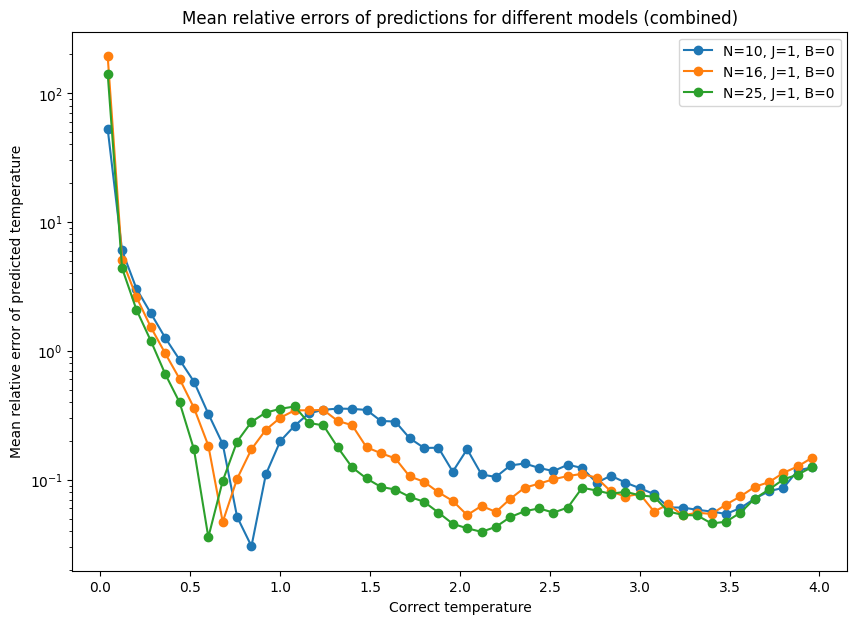

In [5]:
Ns = [10, 16, 25]
Js = [1]
Bs = [0]

bins = 50
temp_max = 4.0
temp_min = 0.0

# Prepare needed lists/parameters

files_not_found = 0
combined_errors = {}
bin_centers = np.arange(0, temp_max, (temp_max - temp_min)/bins) + (temp_max - temp_min)/(2*bins)

for N in Ns:
    for J in Js:
        for B in Bs:
            filename = f"ising_nn_models_translation/N_{N}_J_{J}_B_{B}.csv"
            if not os.path.isfile(filename):
                files_not_found += 1
                continue

            data = np.loadtxt(filename, skiprows=1, delimiter=",")

            fig, ax = plt.subplots(1, 2, figsize=(20, 7))

            ax[0].plot(data[:, 0], data[:, 0], color="red", label="f(x) = x")
            ax[0].scatter(data[:, 0], data[:, 1], label="Data")

            ax[0].set_xlabel("Correct temperature")
            ax[0].set_ylabel("Predicted temperature")
            ax[0].set_title(f"Confusion for model N={N}, J={J}, B={B}")

            ax[0].legend()

            counts = np.zeros(bins)
            errors = np.zeros(bins)

            for temp_init, temp_pred in data:
                bin_index = int(np.floor(temp_init/((temp_max - temp_min)/bins)) if temp_init != temp_max else bins - 1)

                counts[bin_index] += 1
                errors[bin_index] += np.abs((temp_init - temp_pred)/temp_init)
            
            errors /= counts

            combined_errors[(N, J, B)] = errors

            ax[1].plot(bin_centers, errors, marker="o")

            ax[1].set_xlabel("Correct temperature")
            ax[1].set_ylabel("Mean relative error of predicted temperature")
            ax[1].set_title(f"Mean relative error of predictions for model N={N}, J={J}, B={B}")

            ax[1].set_yscale("log")

            plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_xlabel("Correct temperature")
ax.set_ylabel("Mean relative error of predicted temperature")
ax.set_title(f"Mean relative errors of predictions for different models (combined)")

for params, errors in combined_errors.items():
    ax.plot(bin_centers, errors, marker="o", label=f"N={params[0]}, J={params[1]}, B={params[2]}")

ax.set_yscale("log")

ax.legend()

plt.show()

if files_not_found:
    print(f"Warning: Not showing {files_not_found} plots because the related data was not found")

# With preprocessing

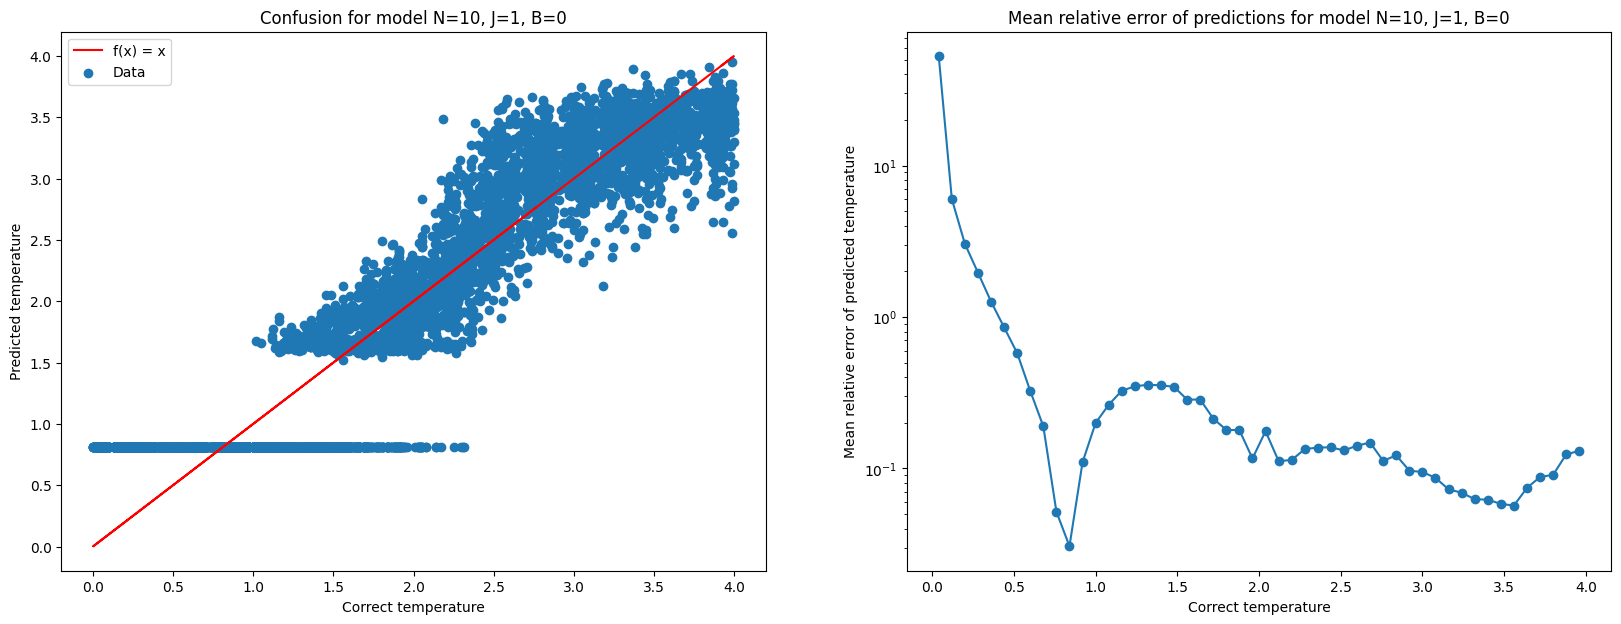

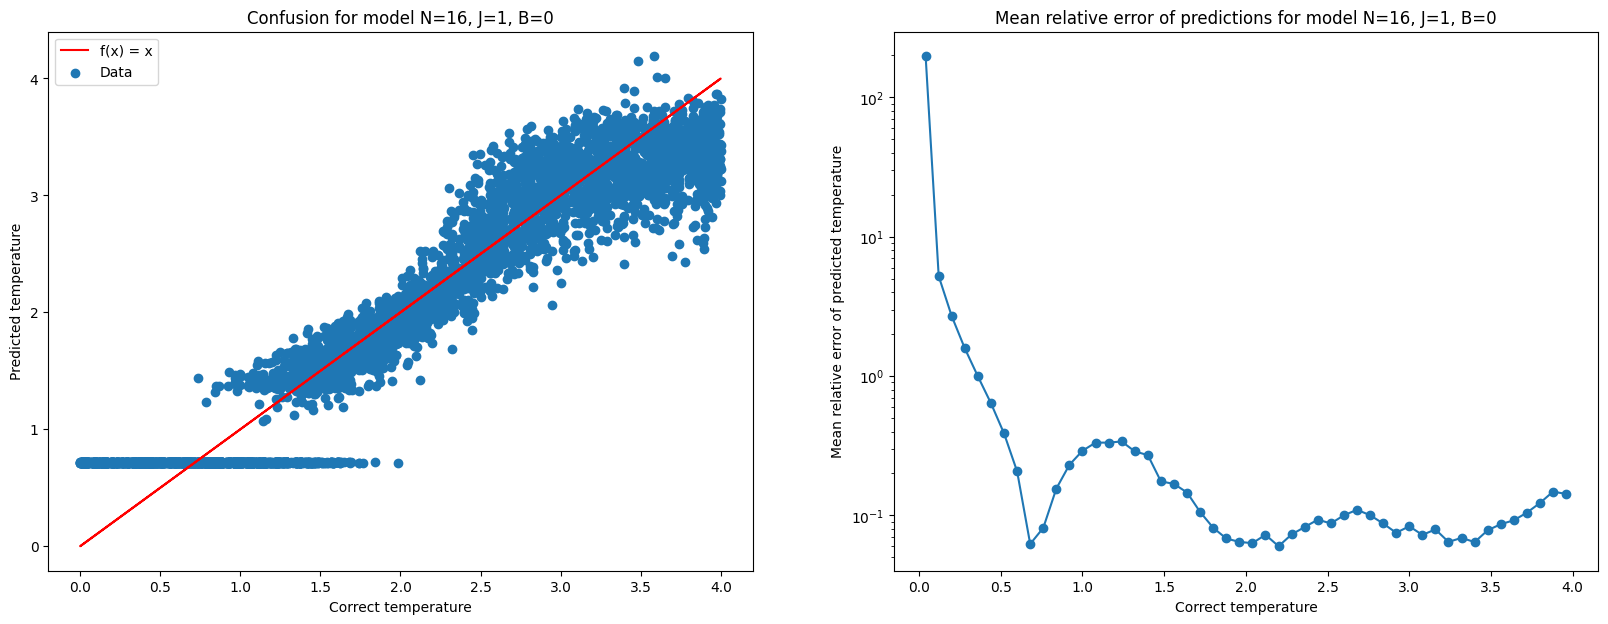

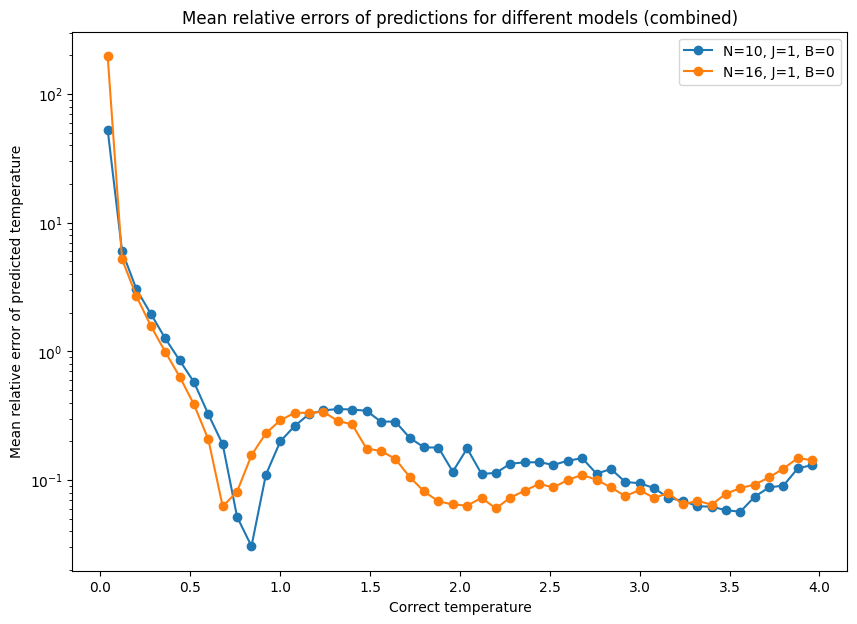

In [2]:
Ns = [10, 16]
Js = [1]
Bs = [0]

bins = 50
temp_max = 4.0
temp_min = 0.0

# Prepare needed lists/parameters

files_not_found = 0
combined_errors = {}
bin_centers = np.arange(0, temp_max, (temp_max - temp_min)/bins) + (temp_max - temp_min)/(2*bins)

for N in Ns:
    for J in Js:
        for B in Bs:
            filename = f"ising_nn_models_preprocessed/N_{N}_J_{J}_B_{B}.csv"
            if not os.path.isfile(filename):
                files_not_found += 1
                continue

            data = np.loadtxt(filename, skiprows=1, delimiter=",")

            fig, ax = plt.subplots(1, 2, figsize=(20, 7))

            ax[0].plot(data[:, 0], data[:, 0], color="red", label="f(x) = x")
            ax[0].scatter(data[:, 0], data[:, 1], label="Data")

            ax[0].set_xlabel("Correct temperature")
            ax[0].set_ylabel("Predicted temperature")
            ax[0].set_title(f"Confusion for model N={N}, J={J}, B={B}")

            ax[0].legend()

            counts = np.zeros(bins)
            errors = np.zeros(bins)

            for temp_init, temp_pred in data:
                bin_index = int(np.floor(temp_init/((temp_max - temp_min)/bins)) if temp_init != temp_max else bins - 1)

                counts[bin_index] += 1
                errors[bin_index] += np.abs((temp_init - temp_pred)/temp_init)
            
            errors /= counts

            combined_errors[(N, J, B)] = errors

            ax[1].plot(bin_centers, errors, marker="o")

            ax[1].set_xlabel("Correct temperature")
            ax[1].set_ylabel("Mean relative error of predicted temperature")
            ax[1].set_title(f"Mean relative error of predictions for model N={N}, J={J}, B={B}")

            ax[1].set_yscale("log")

            plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_xlabel("Correct temperature")
ax.set_ylabel("Mean relative error of predicted temperature")
ax.set_title(f"Mean relative errors of predictions for different models (combined)")

for params, errors in combined_errors.items():
    ax.plot(bin_centers, errors, marker="o", label=f"N={params[0]}, J={params[1]}, B={params[2]}")

ax.set_yscale("log")

ax.legend()

plt.show()

if files_not_found:
    print(f"Warning: Not showing {files_not_found} plots because the related data was not found")